#### Percentile
https://www.youtube.com/watch?v=bcXA4CqRXvM
- x Percentile >>> x% of values are greater than this value and x-100% of values are less than this value.
- Ex: If Max marks scored in an exam is 97, we can say 100 Percentile is 97, which means 100% students got marks less than 97 and no one got marks > 97.
- Ex: If Min marks scored in an exam is 20, we can say 0 Percentile is 20, which means 0% students got marks less than 20 and 100% students got marks > 20.
- .
- <b>Outlier Detection Using Percentile:-
- Based on our understanding of the data, we decide the least and highest percentile and then any value not in that range is called an outlier.
- General we take UpperLimitOutlier as 99% and LowerLimitOutlier as 1%
- We can keep changing the limits untill we get better results.
- .
- <b>Winsorization</b> - If we capping with the min and max percentile values, we call it as Winsorization
- We can manually calculate the upper and lower limit using the percentile
- Or
- We can use the scipy winsorize class
- from scipy.stats.mstats import winsorize
- winsorize(test.cgpa,limits=[0.01,0.99])

In [7]:
import pandas as pd

Weight_Height_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\weight-height.csv")
#Weight_Height_DF.shape #10,000
Weight_Height_DF.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [11]:
## let us consider only height column for this example.

Weight_Height_DF.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height'>

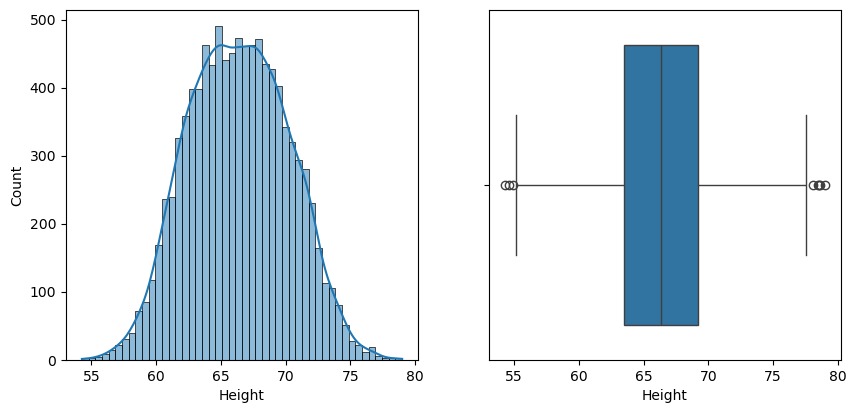

In [25]:
# Draw the distribution plot

import matplotlib.pyplot as plt
import seaborn as sns

# Draw the distribution plot
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(Weight_Height_DF.Height,kde=True)

# Let us also draw a box plot to confirm if there are outliers.
plt.subplot(2,2,2)
sns.boxplot(x=Weight_Height_DF.Height)

In [29]:
# Now let us decide a threshold value to decide upper and lower limit
# Consider 99% for upper and 1% for lower

Upper_Limit = Weight_Height_DF.Height.quantile(0.99)
print("Upper Limit Value Is = ",Upper_Limit)

Lower_Limit = Weight_Height_DF.Height.quantile(0.01)
print("Lower Limit Value Is = ",Lower_Limit)

Upper Limit Value Is =  74.7857900583366
Lower Limit Value Is =  58.13441158671655


In [60]:
# All values above 74.78 and less than 58.13 are considered as outliers.
# Now identify the outliers as we have upper and lower limits

#Weight_Height_DF[Weight_Height_DF.Height >= Upper_Limit] # There are 100 values above upper limit
#Weight_Height_DF[Weight_Height_DF.Height <= Lower_Limit] # There are 100 values below lower limit
#Weight_Height_DF[(Weight_Height_DF.Height <= Lower_Limit) | (Weight_Height_DF.Height >= Upper_Limit)] # Total 200 outliers.

### Remove outliers using Trimming - Drop the records

In [66]:
# Drop the outliers from the dataset

Weight_Height_DF_TrimmedOutliers_Per = Weight_Height_DF[(Weight_Height_DF.Height >= Lower_Limit) & (Weight_Height_DF.Height <= Upper_Limit)]
Weight_Height_DF_TrimmedOutliers_Per.shape

(9800, 3)

In [72]:
Weight_Height_DF_TrimmedOutliers_Per.Height.describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

#### Draw the distribution chart and box plot before dropping outlier data and after dropping the outlier data

<Axes: xlabel='Height'>

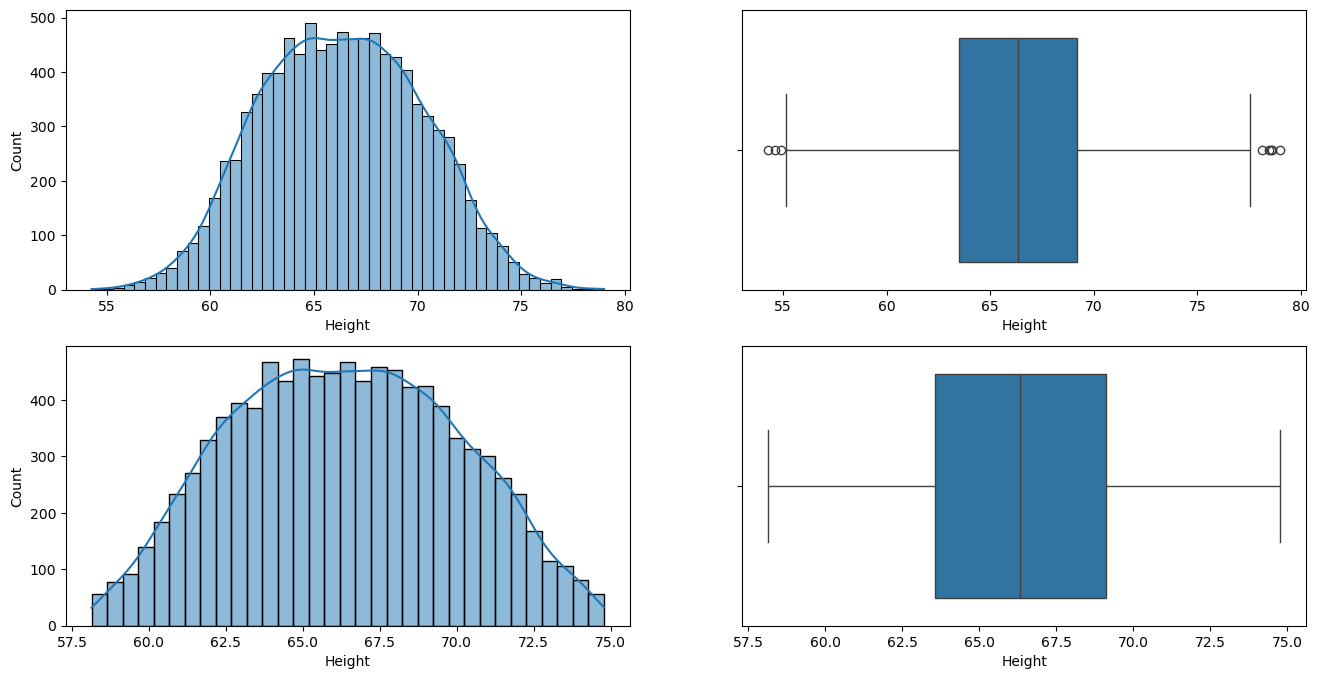

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))

# Plot distrbution plot and box plot for Height before trimming outliers
plt.subplot(2,2,1)
sns.histplot(Weight_Height_DF.Height,kde=True)
plt.subplot(2,2,2)
sns.boxplot(x=Weight_Height_DF.Height)

# Plot distrbution plot and box plot for Height after trimming outliers
plt.subplot(2,2,3)
sns.histplot(Weight_Height_DF_TrimmedOutliers_Per.Height,kde=True)
plt.subplot(2,2,4)
sns.boxplot(x=Weight_Height_DF_TrimmedOutliers_Per.Height)

### Capping OR Winsorization 
- of the outliers using Min and Max Pecentile Values - Do not drop but replace the outliers with min and max Percentile values

In [81]:
# Replace the outliers using the max and min values

# First find the outlier records
Weight_Height_DF[(Weight_Height_DF.Height <= Lower_Limit) | (Weight_Height_DF.Height >= Upper_Limit)].shape

(200, 3)

In [87]:
# Create a copy of Weight_Height_DF and add Capped_Height column

Weight_Height_DF_Capped = Weight_Height_DF.copy()
Weight_Height_DF_Capped['Height_Capped'] = Weight_Height_DF.Height
#Weight_Height_DF_Capped.shape # (10,000,4)
Weight_Height_DF_Capped.head(3)

,Gender,Height,Weight,Height_Capped
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105


In [89]:
# Now replace the lower and higher values on outliers.

# np.where(condition, If_True, IF_False)
# np.where(a < 5, a, 10*a)

import numpy as np
Weight_Height_DF_Capped.Height_Capped = np.where(Weight_Height_DF.Height <= Lower_Limit,Lower_Limit,np.where(Weight_Height_DF.Height >= Upper_Limit,Upper_Limit,Weight_Height_DF.Height))

In [97]:
# Confirm if the values are updated.

Weight_Height_DF_Capped[(Weight_Height_DF_Capped.Height <= Lower_Limit) | (Weight_Height_DF_Capped.Height >= Upper_Limit)]

,Gender,Height,Weight,Height_Capped
23,Male,75.205974,228.761781,74.785790
190,Male,76.709835,235.035419,74.785790
197,Male,75.944460,231.924749,74.785790
202,Male,75.140821,224.124271,74.785790
215,Male,74.795375,232.635403,74.785790
...,...,...,...,...
9761,Female,56.975279,90.341784,58.134412
9825,Female,55.979198,85.417534,58.134412
9895,Female,57.740192,93.652957,58.134412
9904,Female,57.028857,101.202551,58.134412


In [99]:
Weight_Height_DF_Capped.Height_Capped.describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height_Capped, dtype: float64

#### Draw the distribution chart and box plot before capping outlier data and after capping the outlier data

<Axes: xlabel='Height_Capped'>

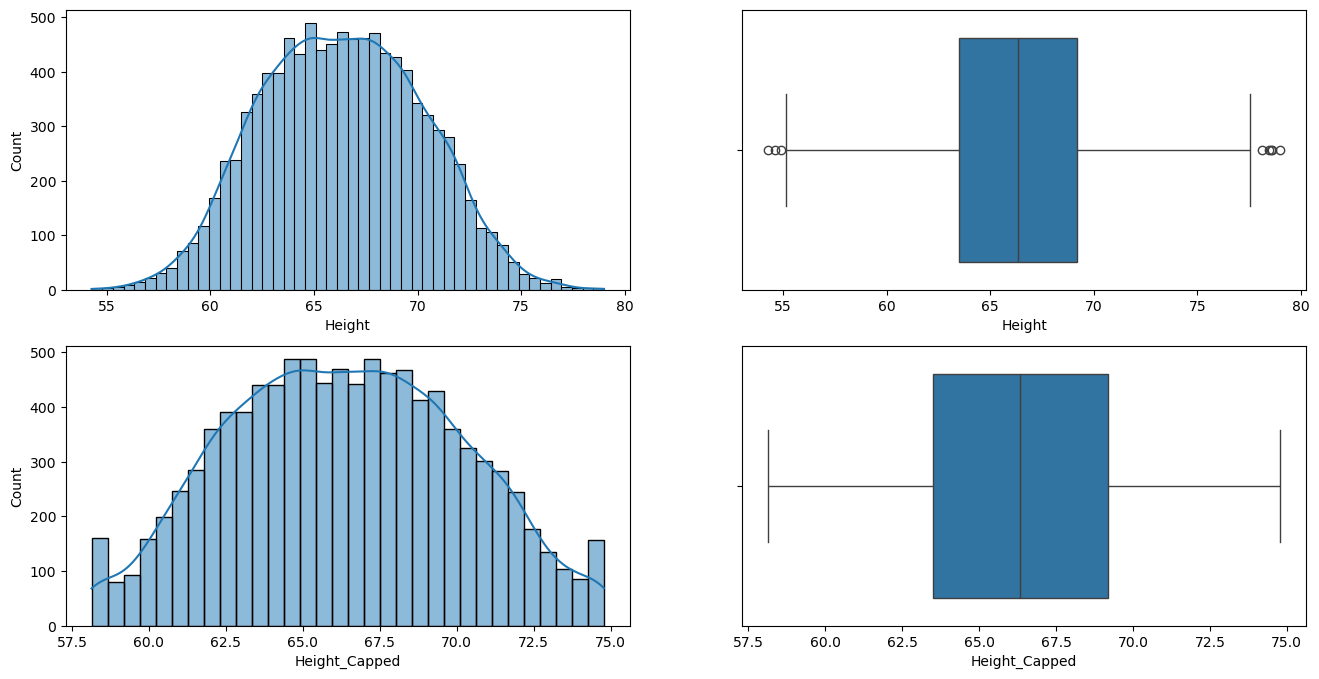

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and give size
plt.figure(figsize=(16,8))

# Plot distrbution plot and box plot for Height before capping outliers
plt.subplot(2,2,1)
sns.histplot(Weight_Height_DF.Height,kde=True)
plt.subplot(2,2,2)
sns.boxplot(x=Weight_Height_DF.Height)
            
# Plot distrbution plot and box plot for Height_Capped after capping outliers
plt.subplot(2,2,3)
sns.histplot(Weight_Height_DF_Capped.Height_Capped,kde=True)
plt.subplot(2,2,4)
sns.boxplot(x=Weight_Height_DF_Capped.Height_Capped)

In [104]:
# We can notice from distribution plot more values at lower and upper limit as all the outliers are updated with max and min values
# We can see from boxplot that there are no outliers now.

### Using Winsorization Class from scifi

In [9]:
Weight_Height_Test = Weight_Height_DF.copy()

In [17]:
from scipy.stats.mstats import winsorize

wd = winsorize(Weight_Height_Test['Weight'],limits=[0.1,0.3])
Weight_Height_Test['Weight_New'] = pd.Series(wd)
Weight_Height_Test.head(3)

,Gender,Height,Weight,Weight_New
0,Male,73.847017,182.312209,182.312209
1,Male,68.781904,162.310473,162.310473
2,Male,74.110105,182.312209,182.312209
